In [8]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns

In [9]:
def add_value_labels(ax, spacing=5):
    # Função adaptada do Stak Oveflow no link: https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
    # Esta função adiciona os value labels acima da barra no gráfico abaixo

    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
            
            
def get_rate(df, season):
    return BreakingBad.loc[(df.Season==season) & (df.EpisodeNumber==SeasonLength[season]), 'Rate'].values[0]

In [10]:
link = 'https://www.imdb.com/title/tt4158110/episodes?season='
season_n = [str(idx) for idx in range(1, 5)]
season_n

['1', '2', '3', '4']

In [11]:
url = [link + idx for idx in season_n]
url

['https://www.imdb.com/title/tt4158110/episodes?season=1',
 'https://www.imdb.com/title/tt4158110/episodes?season=2',
 'https://www.imdb.com/title/tt4158110/episodes?season=3',
 'https://www.imdb.com/title/tt4158110/episodes?season=4']

# Copy

In [12]:
SeasonLength = {1: 10, 2: 12, 3: 10, 4: 13}

In [13]:
%%time
season_dict = {}
get_off = ['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '0', 'Rate', 'Error: please try again.']

for sea, page in enumerate(url):
    search = requests.get(page)
    soup = BeautifulSoup(search.content, 'html.parser')
    results = soup.find(id='episodes_content')
    releases = results.find_all('div', class_='info')
    cleaned_releases = []
    
    for idx, release in enumerate(releases):
        release_text = release.text.strip().split('\n')
        for element in release_text:
            cleaned_element = ' '.join(element.strip().split())
            if cleaned_element not in get_off:
                cleaned_releases.append(cleaned_element)
                
    season = np.array_split(cleaned_releases, SeasonLength[sea + 1])          
    season_dict[sea + 1] = season

Wall time: 4.75 s


In [14]:
season

[array(['6 Oct. 2019', '401 Unauthorized', '9.2', '(8,657)',
        'During the Christmas season, Elliot and Mr. Robot make their return; Darlene deals with real trouble; Tyrell is bored; Dom becomes paranoid.'],
       dtype='<U237'),
 array(['13 Oct. 2019', '402 Payment Required', '8.7', '(6,943)',
        'Elliot and Darlene reconnect; Price gives Elliot some background info and plays his hand; Dom completes the interview, but her lack of confidence raises suspicion with Janice; Some unexpected threats become known to Elliot and Mr. Robot.'],
       dtype='<U237'),
 array(['20 Oct. 2019', '403 Forbidden', '8.7', '(6,924)',
        "Elliot's newest hack helps him share his emotions; Whiterose puts the pieces in motion; Elliot and Darlene have a disagreement; Vera plans his next move; In flashbacks, some key moments in Whiterose's life are revealed."],
       dtype='<U237'),
 array(['27 Oct. 2019', '404 Not Found', '8.7', '(7,733)',
        'Tyrell, Elliot, and Mr. Robot go on a peri

In [15]:
dataframes = {}
for key in season_dict.keys():
    df = pd.DataFrame(season_dict[key], columns=['ReleaseDate', 'EpisodeName', 'Rate', 'Votes', 'EpisodeDescription'])
    df['EpisodeNumber'] = np.arange(1, SeasonLength[key] + 1)
    df['Season'] = key
    dataframes[key] = df

In [16]:
dataframes

{1:     ReleaseDate                  EpisodeName Rate     Votes  \
 0  24 Jun. 2015       eps1.0_hellofriend.mov  9.2  (17,622)   
 1   1 Jul. 2015  eps1.1_ones-and-zer0es.mpeg  8.5  (12,373)   
 2   8 Jul. 2015             eps1.2_d3bug.mkv  8.1  (11,032)   
 3  15 Jul. 2015           eps1.3_da3m0ns.mp4  7.9  (10,987)   
 4  22 Jul. 2015          eps1.4_3xpl0its.wmv  8.4   (9,890)   
 5  29 Jul. 2015    eps1.5_br4ve-trave1er.asf  9.1  (11,702)   
 6   5 Aug. 2015       eps1.6_v1ew-s0urce.flv  8.4   (9,395)   
 7  12 Aug. 2015         eps1.7_wh1ter0se.m4v  9.4  (13,819)   
 8  19 Aug. 2015          eps1.8_m1rr0r1ng.qt  9.2  (11,435)   
 9   2 Sep. 2015          eps1.9_zer0-day.avi  8.7  (10,090)   
 
                                   EpisodeDescription  EpisodeNumber  Season  
 0  A notorious hacker takes an interest in cyber ...              1       1  
 1  Elliot is hesitant about fsociety; Elliot is o...              2       1  
 2  Elliot tries to live a bug-free life, but is q... 

In [17]:
# Concatenate the dataframes into a single dataframe
concatenated_df = pd.concat(dataframes.values(), ignore_index=True)

# Reset the index of the concatenated dataframe
concatenated_df.reset_index(drop=True, inplace=True)

# Print the concatenated dataframe
concatenated_df

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
0,24 Jun. 2015,eps1.0_hellofriend.mov,9.2,"(17,622)",A notorious hacker takes an interest in cyber ...,1,1
1,1 Jul. 2015,eps1.1_ones-and-zer0es.mpeg,8.5,"(12,373)",Elliot is hesitant about fsociety; Elliot is o...,2,1
2,8 Jul. 2015,eps1.2_d3bug.mkv,8.1,"(11,032)","Elliot tries to live a bug-free life, but is q...",3,1
3,15 Jul. 2015,eps1.3_da3m0ns.mp4,7.9,"(10,987)","While dealing with his withdrawal, Elliot suff...",4,1
4,22 Jul. 2015,eps1.4_3xpl0its.wmv,8.4,"(9,890)","Fsociety attempts to penetrate Steel Mountain,...",5,1
5,29 Jul. 2015,eps1.5_br4ve-trave1er.asf,9.1,"(11,702)",Elliot attempts to hack Vera out of jail in or...,6,1
6,5 Aug. 2015,eps1.6_v1ew-s0urce.flv,8.4,"(9,395)",Elliot misses Shayla. Angela makes a deal with...,7,1
7,12 Aug. 2015,eps1.7_wh1ter0se.m4v,9.4,"(13,819)",Allsafe is hacked and Elliot is meeting White ...,8,1
8,19 Aug. 2015,eps1.8_m1rr0r1ng.qt,9.2,"(11,435)","Elliot has to face the challenges of his past,...",9,1
9,2 Sep. 2015,eps1.9_zer0-day.avi,8.7,"(10,090)",Another huge discovery for Elliot surrounding ...,10,1


In [18]:
BreakingBad = concatenated_df.sort_values(by=['Season', 'EpisodeNumber'])

In [19]:
BreakingBad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ReleaseDate         45 non-null     object
 1   EpisodeName         45 non-null     object
 2   Rate                45 non-null     object
 3   Votes               45 non-null     object
 4   EpisodeDescription  45 non-null     object
 5   EpisodeNumber       45 non-null     int32 
 6   Season              45 non-null     int64 
dtypes: int32(1), int64(1), object(5)
memory usage: 2.6+ KB


In [20]:
BreakingBad['Rate'] = BreakingBad['Rate'].apply(lambda x: float(x))
BreakingBad['Votes'] = BreakingBad['Votes'].apply(lambda x: int(x[1:-1].replace(',', '')))

In [21]:
BreakingBad

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
0,24 Jun. 2015,eps1.0_hellofriend.mov,9.2,17622,A notorious hacker takes an interest in cyber ...,1,1
1,1 Jul. 2015,eps1.1_ones-and-zer0es.mpeg,8.5,12373,Elliot is hesitant about fsociety; Elliot is o...,2,1
2,8 Jul. 2015,eps1.2_d3bug.mkv,8.1,11032,"Elliot tries to live a bug-free life, but is q...",3,1
3,15 Jul. 2015,eps1.3_da3m0ns.mp4,7.9,10987,"While dealing with his withdrawal, Elliot suff...",4,1
4,22 Jul. 2015,eps1.4_3xpl0its.wmv,8.4,9890,"Fsociety attempts to penetrate Steel Mountain,...",5,1
5,29 Jul. 2015,eps1.5_br4ve-trave1er.asf,9.1,11702,Elliot attempts to hack Vera out of jail in or...,6,1
6,5 Aug. 2015,eps1.6_v1ew-s0urce.flv,8.4,9395,Elliot misses Shayla. Angela makes a deal with...,7,1
7,12 Aug. 2015,eps1.7_wh1ter0se.m4v,9.4,13819,Allsafe is hacked and Elliot is meeting White ...,8,1
8,19 Aug. 2015,eps1.8_m1rr0r1ng.qt,9.2,11435,"Elliot has to face the challenges of his past,...",9,1
9,2 Sep. 2015,eps1.9_zer0-day.avi,8.7,10090,Another huge discovery for Elliot surrounding ...,10,1


In [22]:
BreakingBad.sort_values(by=['Rate', 'Votes'], ascending=False)[0:10]

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
38,17 Nov. 2019,407 Proxy Authentication Required,9.9,31412,Vera holds Krista hostage as he tries to force...,7,4
44,22 Dec. 2019,"Hello, Elliot",9.8,19360,"Elliot gets to Coney Island, and the delusion ...",13,4
36,3 Nov. 2019,405 Method Not Allowed,9.7,14062,Dom has an unpleasant Christmas. Darlene and E...,5,4
40,1 Dec. 2019,409 Conflict,9.7,13667,Mr. Robot and Darlene attempt to take down the...,9,4
26,8 Nov. 2017,eps3.4_runtime-err0r.r00,9.7,12176,Elliot tries to piece everything together and ...,5,3
27,15 Nov. 2017,eps3.5_kill-pr0cess.inc,9.6,10872,Elliot faces off with Mr. Robot; Dom gets tire...,6,3
43,22 Dec. 2019,whoami,9.5,10757,Elliot wakes up in an abandoned lot following ...,12,4
31,13 Dec. 2017,shutdown -r,9.5,8683,"Elliot tries to save Darlene, but things don't...",10,3
7,12 Aug. 2015,eps1.7_wh1ter0se.m4v,9.4,13819,Allsafe is hacked and Elliot is meeting White ...,8,1
42,15 Dec. 2019,eXit,9.4,9856,Enough is enough. Elliot goes to the Washingto...,11,4


In [23]:
BreakingBad.sort_values(by='Votes', ascending=False)[0:10]

,ReleaseDate,EpisodeName,Rate,Votes,EpisodeDescription,EpisodeNumber,Season
38,17 Nov. 2019,407 Proxy Authentication Required,9.9,31412,Vera holds Krista hostage as he tries to force...,7,4
44,22 Dec. 2019,"Hello, Elliot",9.8,19360,"Elliot gets to Coney Island, and the delusion ...",13,4
0,24 Jun. 2015,eps1.0_hellofriend.mov,9.2,17622,A notorious hacker takes an interest in cyber ...,1,1
36,3 Nov. 2019,405 Method Not Allowed,9.7,14062,Dom has an unpleasant Christmas. Darlene and E...,5,4
7,12 Aug. 2015,eps1.7_wh1ter0se.m4v,9.4,13819,Allsafe is hacked and Elliot is meeting White ...,8,1
40,1 Dec. 2019,409 Conflict,9.7,13667,Mr. Robot and Darlene attempt to take down the...,9,4
1,1 Jul. 2015,eps1.1_ones-and-zer0es.mpeg,8.5,12373,Elliot is hesitant about fsociety; Elliot is o...,2,1
26,8 Nov. 2017,eps3.4_runtime-err0r.r00,9.7,12176,Elliot tries to piece everything together and ...,5,3
5,29 Jul. 2015,eps1.5_br4ve-trave1er.asf,9.1,11702,Elliot attempts to hack Vera out of jail in or...,6,1
8,19 Aug. 2015,eps1.8_m1rr0r1ng.qt,9.2,11435,"Elliot has to face the challenges of his past,...",9,1


In [24]:
BreakingBad.sort_values(by='Rate', ascending=False)[0:10]['EpisodeDescription'].values

array(['Vera holds Krista hostage as he tries to force Elliot into joining him by understanding Mr. Robot. Elliot realizes a shocking truth.',
       'Elliot gets to Coney Island, and the delusion begins to slip. Mr. Robot reveals the truth.',
       'Mr. Robot and Darlene attempt to take down the Deus group as Elliot remains unstable; Price faces off with Whiterose; Whiterose tries to manipulate Elliot; Mr. Robot struggles to figure out how to help Elliot find himself.',
       'Dom has an unpleasant Christmas. Darlene and Elliot perform a daring infiltration. Krista prepares for a date.',
       'Elliot tries to piece everything together and stop Stage 2 as chaos quickly unfolds at E Corp; Angela tries to do a job intended for Elliot while avoiding imminent threats; Darlene brings Elliot up to speed and tells him the truth.',
       'Elliot faces off with Mr. Robot; Dom gets tired of the red tape; Tyrell has a new plan.',
       'Elliot wakes up in an abandoned lot following the expl

In [25]:
aggs_by_cols = {'Rate': [np.min, np.max, np.ptp, np.mean, np.median],
                'Votes': [np.min, np.max, np.sum, np.mean, np.median]}

BreakingBadGroupby = BreakingBad.groupby('Season').agg(aggs_by_cols)

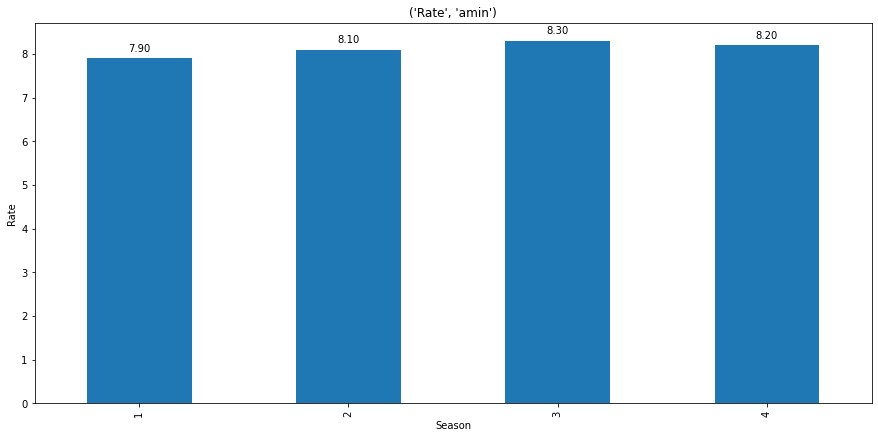

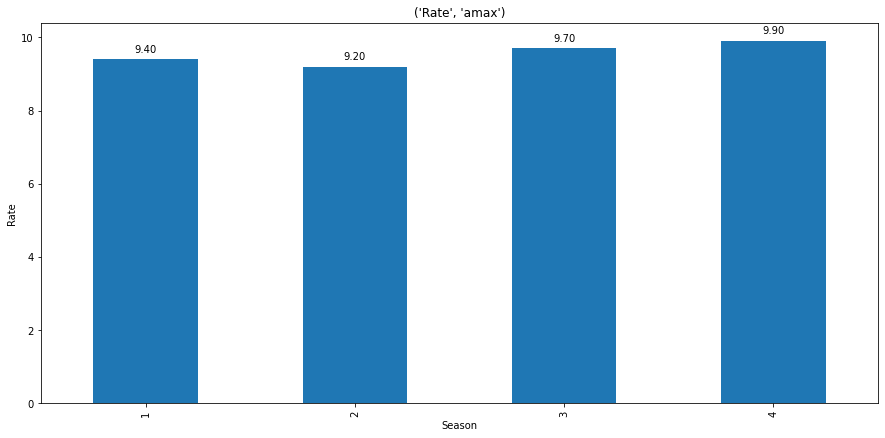

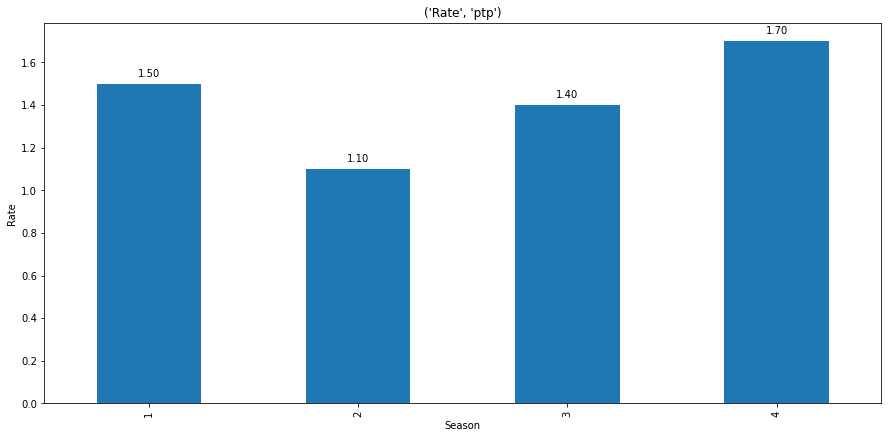

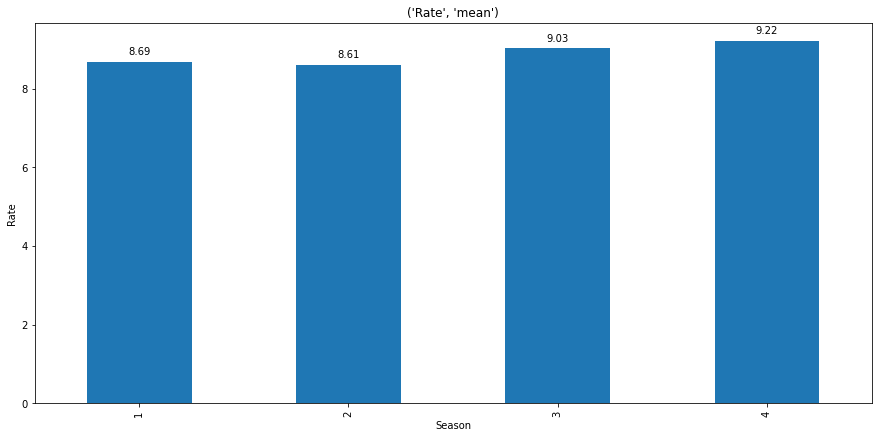

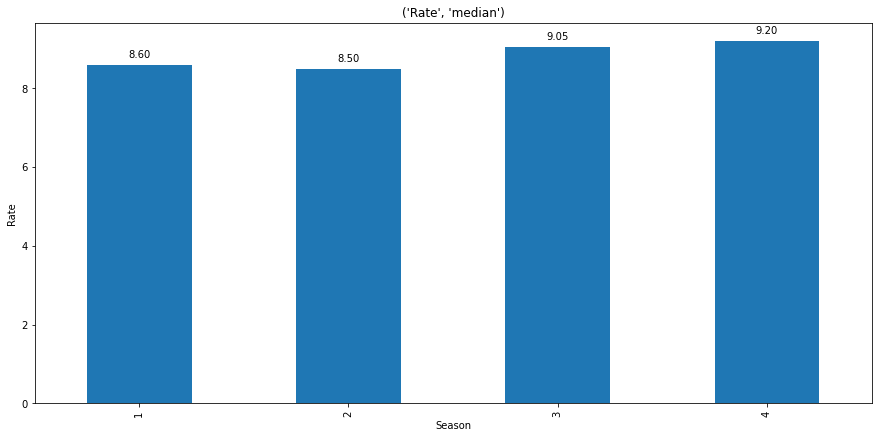

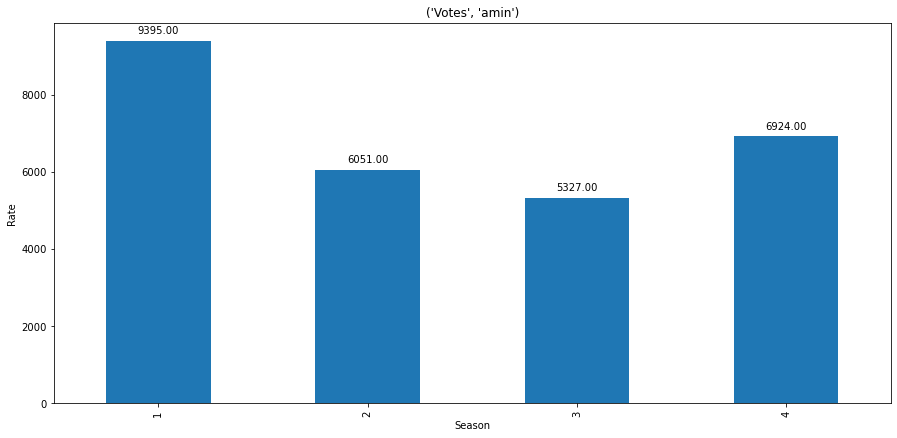

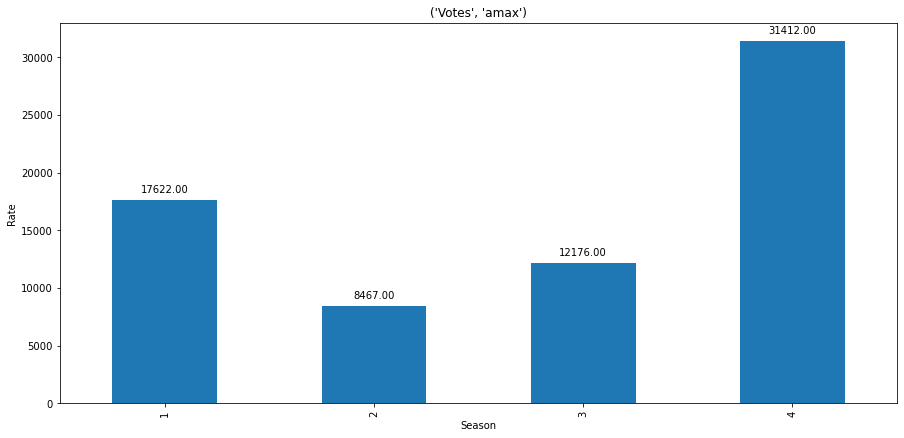

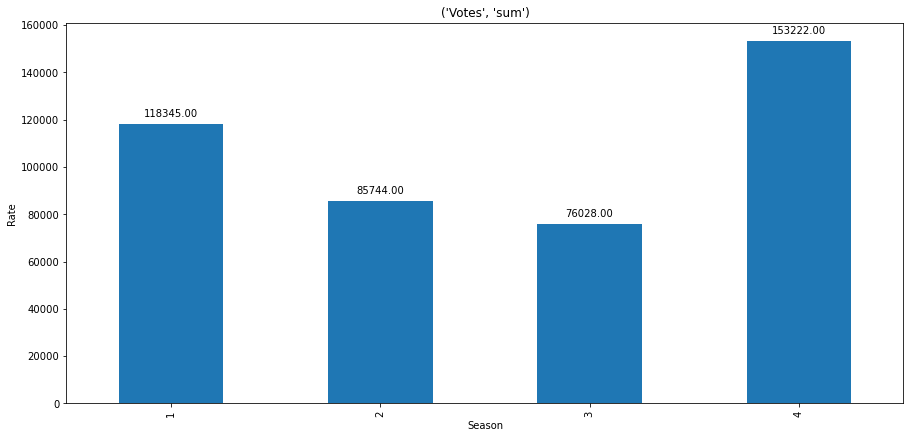

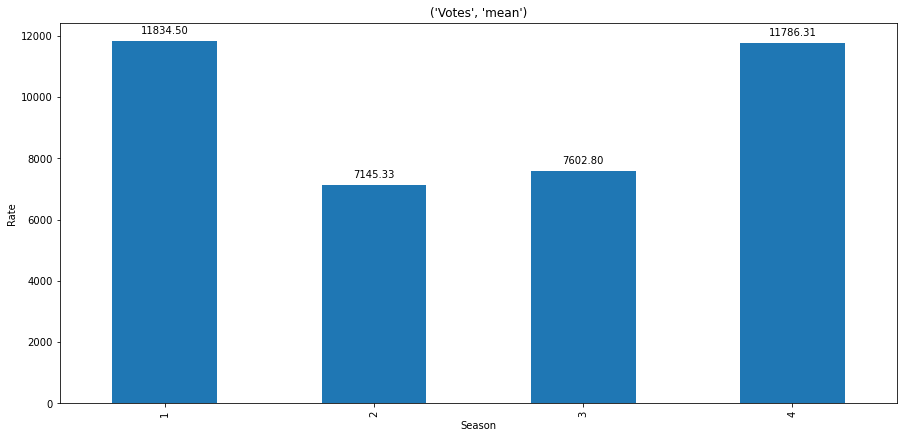

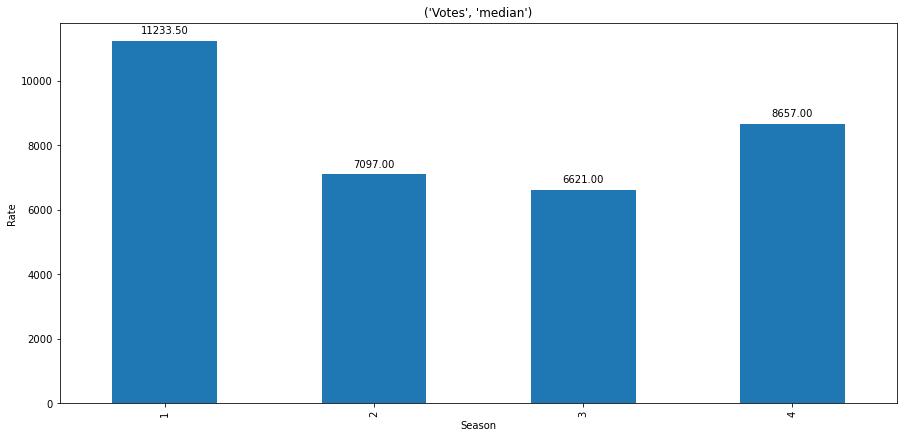

In [26]:
for item in BreakingBadGroupby.columns:
    fig, ax = plt.subplots(figsize=(15, 7))
    BreakingBadGroupby[item].plot(kind='bar')
    ax.set_title(item)
    ax.set_ylabel('Rate')
    ax.set_xlabel('Season')
    add_value_labels(ax)

In [27]:
SeasonFinale = {}
for season in BreakingBad.Season.unique():
    SeasonFinale[season] = get_rate(BreakingBad, season)

In [28]:
SeasonFinale

{1: 8.7, 2: 8.8, 3: 9.5, 4: 9.8}

([<matplotlib.axis.XTick at 0x189be44e820>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

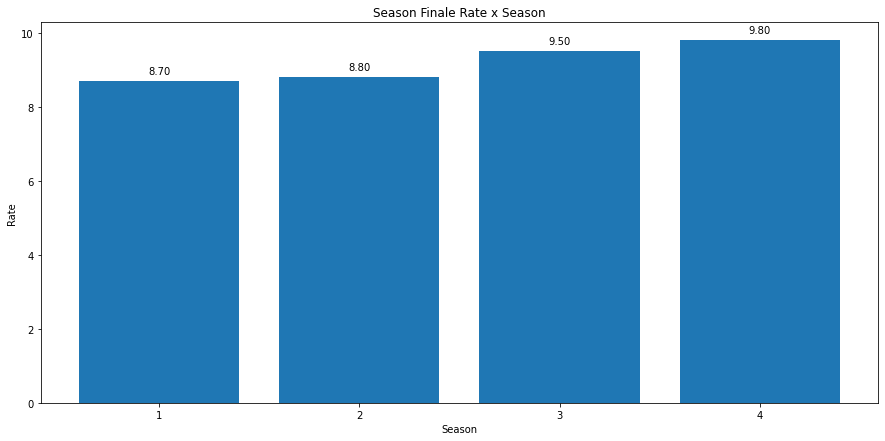

In [29]:
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(SeasonFinale.keys(), SeasonFinale.values())
add_value_labels(ax)
plt.title('Season Finale Rate x Season')
plt.xlabel('Season')
plt.ylabel('Rate')
plt.xticks(list(SeasonFinale.keys()))